In [1]:
#!pip install --upgrade pip
#!pip install pandas
#!pip install seaborn
#!pip install tensorflow
#!pip install keras
#!pip install scikit-learn
#!pip install ase

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
import keras
from sklearn.kernel_ridge import KernelRidge

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from ase.geometry import Cell
from ase.io.aims import read_aims

In [63]:
train_df = pd.read_csv("train.csv")

In [64]:
train_df.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [65]:
#Pull out Targets for later
Targets_df=pd.DataFrame()
Targets_df["bandgap_energy_ev"] = train_df["bandgap_energy_ev"].copy()
Targets_df["formation_energy_ev_natom"] = train_df["formation_energy_ev_natom"].copy()
train_df=train_df.drop(["formation_energy_ev_natom","bandgap_energy_ev"],axis=1) 
train_df=train_df.drop(["id"],axis=1)
Targets_df.head()

,bandgap_energy_ev,formation_energy_ev_natom
0,3.4387,0.0680
1,2.9210,0.2490
2,2.7438,0.1821
3,3.3492,0.2172
4,1.3793,0.0505


In [66]:
numerical_df=pd.DataFrame.copy(train_df[['number_of_total_atoms', 'percent_atom_al',
       'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang',
       'lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree']])
numerical_df = (numerical_df-numerical_df.mean())/numerical_df.std()

one_hot_df=pd.DataFrame.copy(train_df[["spacegroup"]])

one_hot_df=pd.get_dummies(one_hot_df,prefix=["spacegroup"],
                       columns=["spacegroup"])

features_df=pd.concat([numerical_df,one_hot_df],axis=1)

features_df=pd.concat([numerical_df,one_hot_df],axis=1)
features_df.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,spacegroup_12,spacegroup_33,spacegroup_167,spacegroup_194,spacegroup_206,spacegroup_227
0,0.810716,0.902077,0.284100,-1.162464,-0.013764,0.774639,-0.626664,-0.180756,-0.452225,-0.185009,False,True,False,False,False,False
1,0.810716,0.902077,0.284100,-1.162464,-0.681257,-0.477788,2.024569,-0.168758,-0.453036,0.974733,False,False,False,True,False,False
2,-0.959326,1.608115,-0.518151,-1.162464,-0.049421,-0.755147,0.251289,0.543719,-0.240799,-2.484453,False,False,False,False,False,True
3,-1.401836,1.372769,-1.320401,-0.212609,-0.890345,-1.102230,0.172181,-0.191103,-0.450413,0.974702,False,False,True,False,False,False
4,0.810716,-1.451382,1.353767,0.262319,-0.596693,-0.225240,2.199334,-0.185704,-0.452545,0.974223,False,False,False,True,False,False


In [67]:
Targets_df = np.log1p(Targets_df)
Y1 = Targets_df["bandgap_energy_ev"]
Y2 = Targets_df["formation_energy_ev_natom"]
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(features_df, Y1, test_size=0.2, random_state=2017)
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(features_df, Y2, test_size=0.2, random_state=2017)

In [68]:
clf5 = KernelRidge(kernel ='laplacian', alpha=1.0)
clf6 = KernelRidge(kernel ='laplacian', alpha=1.0)

clf5.fit(X_train1,y_train1)
clf6.fit(X_train2, y_train2)

preds1 = clf5.predict(X_valid1)
preds2 = clf6.predict(X_valid2)

y_pred1 = np.exp(preds1)-1
y_pred2 = np.exp(preds2)-1

rsme_valid1 = np.sqrt(mean_squared_error(y_valid1,preds1))
rsme_valid2 = np.sqrt(mean_squared_error(y_valid2,preds2))

rsme_total = np.sqrt(rsme_valid1*rsme_valid1+rsme_valid2*rsme_valid2)
print('RSME for formation energy:')
print(rsme_valid1)
print('RSME for band gap:')
print(rsme_valid2)
print('RSME for total:')
print(rsme_total)

RSME for formation energy:
0.09314601571481751
RSME for band gap:
0.031904880387260304
RSME for total:
0.09845862905845489


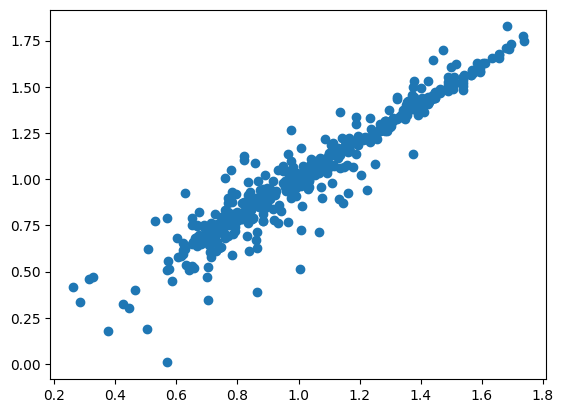

In [69]:
plt.scatter(preds1, y_valid1)

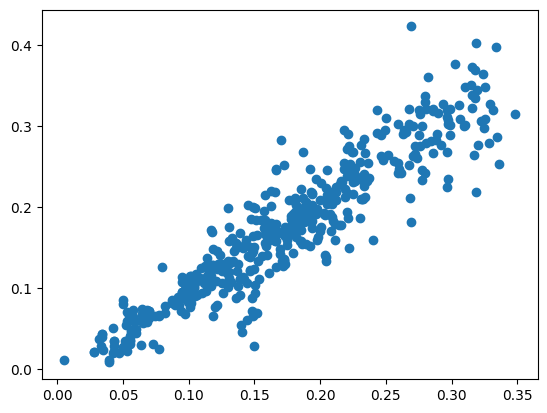

In [70]:
plt.scatter(preds2, y_valid2)

In [71]:
def generate_NN(n_layers, n_features, n_input, n_output, activation, optimizer, loss="mean_squared_error", reg=0.0):
    """
    Basic template to generate a deep neural network with uniform number of features, activation etc.
    ### Inputs ###
    n_layers: defining the total number of dense layers, int
    n_features: Number of perceptrons per layer, int
    n_output: Number of input features, int
    n_output: Number of output features, int
    activation: Activation function applied in each layer
    Optional: loss function, optimizer
    ### Output ###
    nn: Keras Neural Network
    """
    from keras.models import Sequential 
    from keras.layers import Dense, BatchNormalization
    from keras.regularizers import L2
    
    nn = Sequential()
    for i in range(n_layers):
        if i == 1:
            nn.add(Dense(n_features, input_dim=n_input, activation=activation, kernel_regularizer=L2(reg)))
            nn.add(BatchNormalization())
        elif i > 1:
            nn.add(Dense(n_features, input_dim=n_features, activation=activation, kernel_regularizer=L2(reg)))
            nn.add(BatchNormalization())

    nn.add(Dense(n_output, input_dim=n_input))
    nn.compile(loss=loss, optimizer=optimizer)
    return nn

In [96]:
# NN Parameter
n_features = 32
n_layers = 3
learning_rate = 0.001
regularization = 0.0001
activation = "relu"
iterations = 200
batch_size = 20
input_features = features_df.shape[-1]

In [97]:
optimizer = keras.optimizers.Adam(learning_rate=learning_rate) 
model = generate_NN(n_layers, n_features, input_features, 2, activation, optimizer, reg=regularization)

In [98]:
X_train, X_valid, y_train, y_valid = train_test_split(features_df, Targets_df, test_size=0.2, random_state=2017)
model.fit(np.array(X_train).astype('float32'), np.array(y_train).astype('float32'), epochs=iterations, batch_size=batch_size)

Epoch 1/200
96/96 [==============================] - 1s 2ms/step - loss: 0.6435
Epoch 2/200
96/96 [==============================] - 0s 2ms/step - loss: 0.1536
Epoch 3/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0735
Epoch 4/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 5/200
96/96 [==============================] - 0s 1ms/step - loss: 0.0460
Epoch 6/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 7/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0363
Epoch 8/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0338
Epoch 9/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 10/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 11/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 12/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 13/200
96/96 [=================

In [100]:
pred = model.predict(np.array(X_valid, dtype=np.float32))

y_valid1 = np.array(y_valid)[:, 0]
y_valid2 = np.array(y_valid)[:, 1]
preds1 = pred[:, 0]
preds2 = pred[:, 1]
rsme_valid1 = np.sqrt(mean_squared_error(y_valid1,preds1))
rsme_valid2 = np.sqrt(mean_squared_error(y_valid2,preds2))

rsme_total = np.sqrt(rsme_valid1*rsme_valid1+rsme_valid2*rsme_valid2)
print('RSME for formation energy:')
print(rsme_valid1)
print('RSME for band gap:')
print(rsme_valid2)
print('RSME for total:')
print(rsme_total)

15/15 [==============================] - 0s 883us/step
RSME for formation energy:
0.08899898000193855
RSME for band gap:
0.03478438471808113
RSME for total:
0.09555507240121236


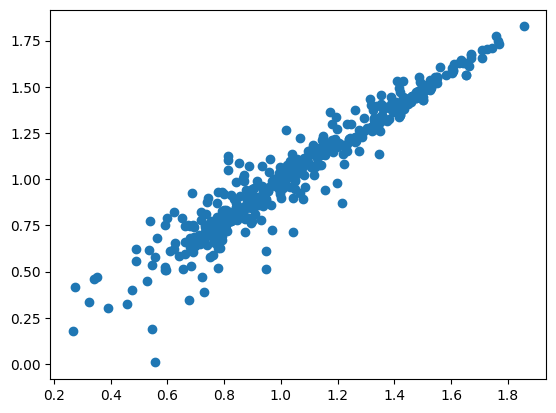

In [101]:
plt.scatter(preds1, y_valid1)

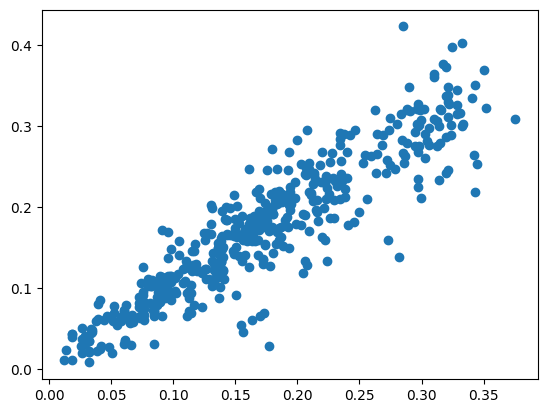

In [102]:
plt.scatter(preds2, y_valid2)

In [78]:
def volume(atom):
    """
    Calculates the volume of a unit cell
    """
    return atom.get_volume()


def valence_d_electrons(atom):
    """
    Calculates the fraction of d electrons in the valence shell
    """
    Z = atom.get_atomic_numbers()
    n_d = np.sum((Z == 31) * 10 + (Z == 49) * 10) 
    n_v = np.sum((Z == 31) * 13 + (Z == 49) * 13 + (Z == 13) * 3 + (Z == 8) * 6)
    d_frac = n_d / n_v
    return d_frac

def mean_metal_distance(atom):
    """
    Calculates the mean distance between metal centres in the unit cell
    """
    pos = atom.positions
    Z = atom.get_atomic_numbers()
    metal_pos = pos[Z != 8]
    mean = 0
    N = metal_pos.shape[0]
    for i, pos1 in enumerate(metal_pos[:-1]):
        d = np.linalg.norm(metal_pos[(i + 1):] - pos1, axis=1)
        mean += np.sum(d) / (N - i - 1)
    return mean / (i)


def mean_oxygen_distance(atom):
    """
    Calculates the mean distance between metal centres in the unit cell
    """
    pos = atom.positions
    Z = atom.get_atomic_numbers()
    metal_pos = pos[Z != 8]
    oxygen_pos = pos[Z == 8]
    mean = 0
    N = metal_pos.shape[0]
    for i, pos1 in enumerate(oxygen_pos):
        d = np.linalg.norm(metal_pos - pos1, axis=1)
        mean += np.sum(d) / N
    return mean / (i + 1)

In [79]:
train_volume = np.zeros(train_df.shape[0])
train_d = np.zeros(train_df.shape[0])
train_m_dist = np.zeros(train_df.shape[0])
train_o_dist = np.zeros(train_df.shape[0])

for i in train_df.index:
    filename = f"train/{i+1}/geometry.xyz"
    atom = read_aims(filename)
    train_volume[i] = volume(atom)
    train_d[i] = valence_d_electrons(atom)
    train_m_dist[i] = mean_metal_distance(atom)
    train_o_dist[i] = mean_oxygen_distance(atom)

    # Feel free to add further properties here

features_df["Volume"] = (train_volume - train_volume.mean()) / train_volume.std()
features_df["d-Electrons"] = (train_d - train_d.mean()) / train_d.std()
features_df["MeanMDistance"] = (train_m_dist - train_m_dist.mean()) / train_m_dist.std()
features_df["MeanODistance"] = (train_o_dist - train_o_dist.mean()) / train_o_dist.std()
input_features = features_df.shape[-1]
optimizer = keras.optimizers.Adam(learning_rate=learning_rate) 
model = generate_NN(n_layers, n_features, input_features, 2, activation, optimizer, reg=regularization)

In [80]:
X_train, X_valid, y_train, y_valid = train_test_split(features_df, Targets_df, test_size=0.2, random_state=2017)
model.fit(np.array(X_train).astype('float32'), np.array(y_train).astype('float32'), epochs=iterations, batch_size=batch_size, callbacks=keras.callbacks.TensorBoard())

Epoch 1/200
96/96 [==============================] - 1s 2ms/step - loss: 0.7464
Epoch 2/200
96/96 [==============================] - 0s 3ms/step - loss: 0.1435
Epoch 3/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 4/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 5/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 6/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0272
Epoch 7/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 8/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 9/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 10/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 11/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 12/200
96/96 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 13/200
96/96 [=================

In [81]:
pred = model.predict(np.array(X_valid, dtype=np.float32))
pred_train = model.predict(np.array(X_train, dtype=np.float32))
model.evaluate(np.array(X_valid, dtype=np.float32), np.array(y_valid, dtype=np.float32))
y_valid3 = np.array(y_valid)[:, 0]
y_valid4 = np.array(y_valid)[:, 1]
preds3 = pred[:, 0]
preds4 = pred[:, 1]
rsme_valid1 = np.sqrt(mean_squared_error(y_valid3,preds3))
rsme_valid2 = np.sqrt(mean_squared_error(y_valid4,preds4))

rsme_total = np.sqrt(rsme_valid1*rsme_valid1+rsme_valid2*rsme_valid2)
print('RSME for formation energy:')
print(rsme_valid1)
print('RSME for band gap:')
print(rsme_valid2)
print('RSME for total:')
print(rsme_total)

15/15 [==============================] - 0s 1ms/step - loss: 0.0056
RSME for formation energy:
0.09021606555528368
RSME for band gap:
0.03636881398536503
RSME for total:
0.0972709057990997


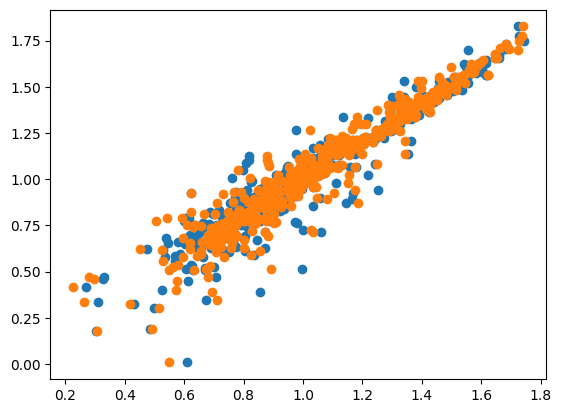

In [82]:
plt.scatter(preds1, y_valid1)
plt.scatter(preds3, y_valid3)

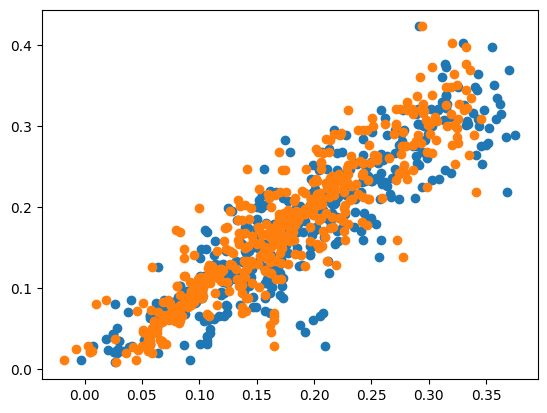

In [83]:
plt.scatter(preds2, y_valid2)
plt.scatter(preds4, y_valid4)

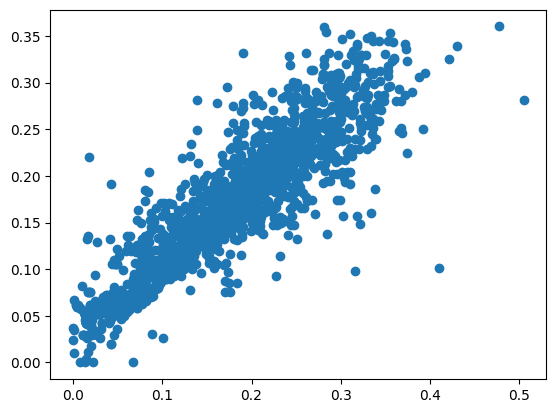

In [25]:
plt.scatter(np.array(y_train)[:,1], pred_train[:,1])